## Animation of Mn surface field

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
from datetime import date
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

%matplotlib inline

##### Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
# year  = 2015
results_folder = '/data/brogalla/run_storage/Mn-set4-202004/'

##### Load files:

In [3]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

ref   = nc.Dataset(results_folder+'ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

e1t_base = np.array(mask.variables['e1t'])[0,imin:imax,jmin:jmax]
e2t_base = np.array(mask.variables['e2t'])[0,imin:imax,jmin:jmax]
e3t      = np.array(mask.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]

e1t      = np.tile(e1t_base, (50,1,1))
e2t      = np.tile(e2t_base, (50,1,1))
volume   = e1t*e2t*e3t

In [4]:
dissolmn_array = np.empty((18,12,isize,jsize))
i=0

for year in range(2002, 2020):
    
    results  = nc.Dataset(results_folder+'ref-'+str(year)+'/ANHA12_EXH006_'+str(year)+'_monthly.nc')
    dissolmn_array[i,:,:,:] = np.array(results.variables['dissolmn'][:,0,0,:,:])*10**9 # nM units
    i+=1

In [5]:
dmn_array = np.reshape(dissolmn_array, (12*18,isize,jsize))

##### Functions:

In [6]:
def plot_layer(fig, month, variable, vmin=0,vmax=35, savefig=False):

    proj1   = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='h', width=4.5e6, height=2.98e6, ax=ax)
    
    x, y    = proj1(lons, lats)
    contour = proj1.contourf(x, y, variable[month,:,:], np.arange(vmin,vmax+1,1.25),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.73, 0.21, 0.05, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=[0,5,10,15,20,25,30])
    cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=13)
    
    year = 2002+np.floor(month/12)
    mnth = month - np.floor(month/12)*12
    ax.set_title('Year: '+str(int(year))+', month: '+str(int(mnth)))
    
    return

In [7]:
def animate_full(frames):
    
    # each frame is a month

    plot_layer(fig, frames, dmn_array)
    
    return

##### Animation:

In [8]:
rc('animation', html='html5')

/home/brogalla/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


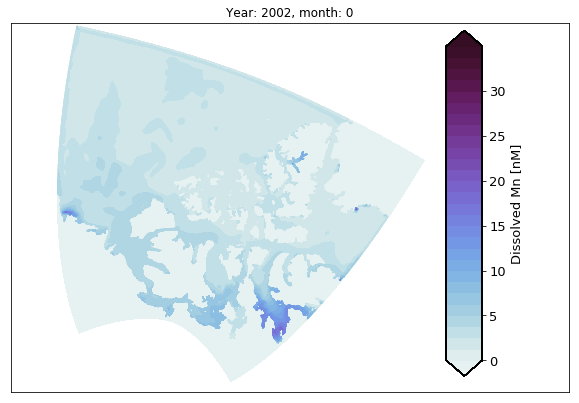

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ani = animation.FuncAnimation(fig, animate_full, frames=216, interval=200)
ani
ani.save('/ocean/brogalla/GEOTRACES/mn-ref4-202006.mp4', dpi=300, fps=14)